### Analyzing Median Rent as a Percentage of Income
*Comparing individual and family incomes

In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [2]:
file = pd.read_csv('ipums_clean.csv')

In [3]:
# Grouping rent amounts in increments of 100
increment = 100
for num in range(10, 4000, 10):
    if num <= increment:
        file.loc[file.RENT.isin([num]), 'RENT'] = increment
    else:
        increment+=100
        file.loc[file.RENT.isin([num]), 'RENT'] = increment

In [4]:
file.RENT.value_counts()[:10]

0       21564
1000     1736
900      1430
800      1328
700      1115
1200     1015
1100     1006
1300      939
1400      856
600       842
Name: RENT, dtype: int64

In [5]:
len(file)

38158

In [6]:
#Removing rows containing rent of 0 (i.e. N/A, as per: https://usa.ipums.org/usa-action/variables/RENT#codes_section)
file = file[file.RENT != 0]
len(file)

16594

In [7]:
file.RENT.value_counts()[:10]

1000    1736
900     1430
800     1328
700     1115
1200    1015
1100    1006
1300     939
1400     856
600      842
1500     829
Name: RENT, dtype: int64

----------

### (1) *Individual* Income 

In [8]:
indiv_income = pd.DataFrame()
for year in range(2006, 2018):
    df = file[file.YEAR == year]
    
    incomes = np.array([])
    for i, row in df[['INCTOT', 'PERWT']].iterrows():
        income = np.full(row.PERWT, row.INCTOT)
        incomes = np.append(incomes, income)
    inc = np.median(incomes)

    rents = np.array([])
    for i, row in df[['RENT', 'PERWT']].iterrows():
        rent = np.full(row.PERWT, row.RENT)
        rents = np.append(rents, rent)
    rent = np.median(rents)
    
    
    individual = {'Year':pd.Series(year), 'Indiv_Income':pd.Series(inc)/12, 'Rent':pd.Series(rent)}  #Indiv_Income divided by 12 to return monthly amount (like Rent)
    values = pd.DataFrame(individual)
    indiv_income = pd.concat([indiv_income, values])
year = indiv_income.Year.astype('str')
indiv_income.Year = pd.to_datetime(year)

indiv_income['Ratio'] = indiv_income.Rent / indiv_income.Indiv_Income

In [9]:
indiv_income

,Year,Indiv_Income,Rent,Ratio
0,2006-01-01,2083.333333,1000.0,0.480000
0,2007-01-01,2333.333333,1000.0,0.428571
0,2008-01-01,2366.666667,1100.0,0.464789
0,2009-01-01,2000.000000,1000.0,0.500000
0,2010-01-01,2083.333333,1000.0,0.480000
0,2011-01-01,2085.833333,1000.0,0.479425
0,2012-01-01,2083.333333,1100.0,0.528000
0,2013-01-01,2450.000000,1100.0,0.448980
0,2014-01-01,2083.333333,1200.0,0.576000
0,2015-01-01,2166.666667,1200.0,0.553846


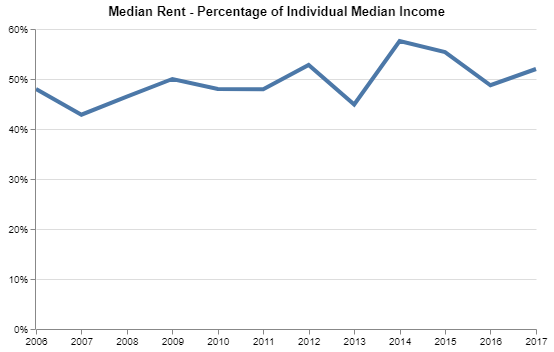

In [10]:
alt.Chart(indiv_income).mark_line(strokeWidth=4).encode(
    x=alt.X('Year', title=None, axis=alt.Axis(grid=False, labelFlush=False)), 
    y=alt.Y('Ratio', axis=alt.Axis(offset=1, format='%'), title=None)
).properties(title='Median Rent - Percentage of Individual Median Income', width=500).configure_view(strokeWidth=0)

-------------

### (2) *Family* Income 

In [11]:
fam_income = pd.DataFrame()
for year in range(2006, 2018):
    df = file[file.YEAR == year]
    
    incomes = np.array([])
    for i, row in df[['FTOTINC', 'PERWT']].iterrows():
        income = np.full(row.PERWT, row.FTOTINC)
        incomes = np.append(incomes, income)
    inc = np.median(incomes)

    rents = np.array([])
    for i, row in df[['RENT', 'PERWT']].iterrows():
        rent = np.full(row.PERWT, row.RENT)
        rents = np.append(rents, rent)
    rent = np.median(rents)
    
    
    individual = {'Year':pd.Series(year), 'Fam_Income':pd.Series(inc)/12, 'Rent':pd.Series(rent)}  #Fam_Income divided by 12 to return monthly amount (like Rent)
    values = pd.DataFrame(individual)
    fam_income = pd.concat([fam_income, values])
year = fam_income.Year.astype('str')
fam_income.Year = pd.to_datetime(year)

fam_income['Ratio'] = fam_income.Rent / fam_income.Fam_Income

In [12]:
fam_income

,Year,Fam_Income,Rent,Ratio
0,2006-01-01,2337.500000,1000.0,0.427807
0,2007-01-01,2916.666667,1000.0,0.342857
0,2008-01-01,2883.333333,1100.0,0.381503
0,2009-01-01,2916.666667,1000.0,0.342857
0,2010-01-01,2883.333333,1000.0,0.346821
0,2011-01-01,2825.000000,1000.0,0.353982
0,2012-01-01,2650.000000,1100.0,0.415094
0,2013-01-01,3333.333333,1100.0,0.330000
0,2014-01-01,2916.666667,1200.0,0.411429
0,2015-01-01,2833.333333,1200.0,0.423529


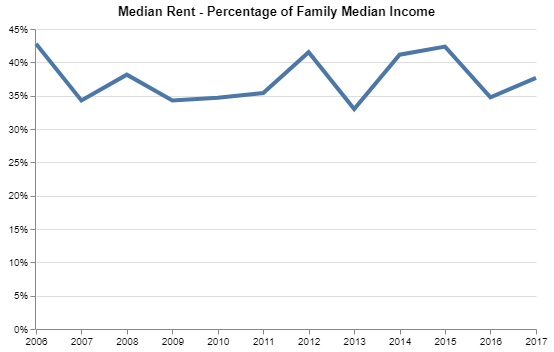

In [13]:
alt.Chart(fam_income).mark_line(strokeWidth=4).encode(
    x=alt.X('Year', title=None, axis=alt.Axis(grid=False, labelFlush=False)), 
    y=alt.Y('Ratio', axis=alt.Axis(offset=1, format='%'), title=None)
).properties(title='Median Rent - Percentage of Family Median Income', width=500).configure_view(strokeWidth=0)